<h1><center>Workshop: Introduction to Scikit-learn</center></h1>
<h3><center>Xu Wang</center></h3>
<h3><center>xuwang@bu.edu</center></h3>

# 1. Introduction



## What is scikit-learn?

- A Python package.

- Designed for machine learning.

## Why we need scikit-learn?

- Simple. You don't need to know everything.

- Efficient. Well implemented and optimized. 

## When can we use scikit-learn?

### Data Analysis

- Loading, analysis, preprocessing

### Model Implementation

- Training, validation, tuning, ensembling

### Performance Assessment

- scoring, presenting

# 2. Demonstration

### Data Analysis <=

- Loading, analysis, preprocessing

### Model Implementation

- Training, validation, tuning, ensembling

### Performance Assessment

- scoring, presenting

## 2.1 Dataset Loading Utilities

### General dataset API:

- **Dataset loaders**: load small standard datasets.

- **Dataset fetchers**: download and load larger datasets.

- **Dataset generation functions**: generate controlled synthetic datasets

In [1]:
# Dataset loaders

from sklearn.datasets import load_iris

dataset = load_iris(return_X_y=False, as_frame=False)
print("Class type of dataset: ", type(dataset)) #Bunch: dictionary-like object
print("Keys of dataset: ",dataset.keys())
print("Shape of data: ", dataset['data'].shape)
print("First 5 samples: ")
print(dataset['data'][:5])

Class type of dataset:  <class 'sklearn.utils.Bunch'>
Keys of dataset:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of data:  (150, 4)
First 5 samples: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
print("Description of dataset: ", dataset['DESCR'])

Description of dataset:  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== 

In [3]:
# Dataset fetchers

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(download_if_missing=True)
print("Keys of dataset: ",dataset.keys())

Keys of dataset:  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


#### Dataset Generators
- Generators for classification and clustering
- Generators for regression
- Generators for manifold learning
- Generators for decomposition

In [4]:
# Dataset generation functions
# Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, centers=3, n_features=2,
                  random_state=3)
print("Shape of X:", X.shape)
print("Y:",y)

Shape of X: (20, 2)
Y: [2 1 1 2 2 2 0 2 1 0 1 0 1 1 0 1 0 0 2 0]


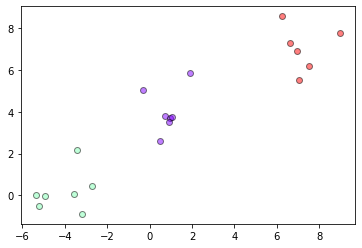

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

colors = cm.rainbow(np.linspace(0.0, 1.0, 3))
for this_y, color in enumerate(colors):
    this_X = X[y == this_y]
    plt.scatter(
        this_X[:, 0],
        this_X[:, 1],
        c=color[np.newaxis, :],
        alpha=0.5,
        edgecolor="k",
        label="Class %s" % this_y,
    )
plt.show()

## 2.2 Data Pre-processing

- Unifying data format

- Data distribution processing

- Genearating more features

- Train/Test split

- Others...

### Takeaway:

- Initialize( )

- .fit( ): processor learns something from data

- .transform( ): processor applies what it learns

- .fit_transform( ): .fit( ) + .transform( )

### 2.2.1 Unifying data format

- Categorical features processing: 
    - integer encoding
    - one-hot encoding

- \*Imputation of missing values

In [6]:
# Categorical features to integer codes
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [7]:
# Categorical features to one-hot features
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
print("Categories: ", enc.categories_)

Categories:  [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


In [8]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [9]:
# Missing value inputation
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


### 2.2.2  Data distribution processing

- Linear transformation: 
    - standardization
    - scaling
    - mean removal

- Non-linear transformation
    - mapping to Uniform/Gaussian distribution

- Normalization

#### Standardization

In [10]:
# Standardization

from sklearn import preprocessing
from sklearn.datasets import load_iris

dataset = load_iris(return_X_y=False, as_frame=False)
X = dataset['data']
y = dataset['target']

scaler = preprocessing.StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(X)

print("Mean of each feature: ", scaler.mean_)
print("Scale of each feature: ", scaler.scale_)

#Perform standardization by centering and scaling
X_scaled = scaler.transform(X)

Mean of each feature:  [5.84333333 3.05733333 3.758      1.19933333]
Scale of each feature:  [0.82530129 0.43441097 1.75940407 0.75969263]


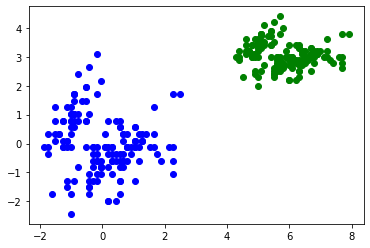

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], color = 'g')
plt.scatter(X_scaled[:,0], X_scaled[:,1], color = 'b')
plt.show()

#### Map to Uniform/Gaussian distribution

In [12]:
# Non-linear transformation
## To uniform distribution
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_trans = quantile_transformer.fit_transform(X)
print("Before transformation:", np.percentile(X[:, 0], [0, 25, 50, 75, 100]))
print("After transformation:", np.percentile(X_trans[:, 0], [0, 25, 50, 75, 100]))

Before transformation: [4.3 5.1 5.8 6.4 7.9]
After transformation: [0.         0.24161074 0.51006711 0.74496644 1.        ]


/Users/aaronang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [13]:
## To Gaussian distribution
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_trans_normal = pt.fit_transform(X)

#### Normalization:  scaling individual samples to have unit norm

In [14]:
# Normalization
X_normalized = preprocessing.normalize(X, norm='l2')
print("After normalization: ")
print(X_normalized[:4])

After normalization: 
[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]]


### 2.2.3 Genearating more features

- Generate polynomial features

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
print("Original X:")
print(X)

poly = PolynomialFeatures(2)
X_trans = poly.fit_transform(X)
print("New X: ")
print(X_trans)

Original X:
[[0 1]
 [2 3]
 [4 5]]
New X: 
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


### 2.2.4 Train/Test split

- Split dataset into training set and test set

In [16]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number of training samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of training samples:  120
Number of test samples:  30


### 2.2.5 Others...

- Discretizaition
    - K-bins discretization
    - Feature binarization
- Custom transformers...

### Data Analysis (X)

- Loading, analysis, preprocessing

### Model Implementation <=

- Training, validation, tuning, ensembling

### Performance Assessment

- scoring, presenting

## 2.3 Algorithms

### Supervised Learning: 
- Classification models: Nearest Neighbor, Logistic Regression, SVM, Decision Tree, MLP...
- Regression models: Linear Regression, Bayesian Regressian...
- Stochastic Gradient Descent(SGD)

### Unsupervised Learning:
- Clustering: K-means, Gaussian Mixtures

### Dimensionality Reduction:
- PCA, LDA, ...

### Takeaway:

- Initialize( )

- .fit( ): the model learns the data

- .predict( ): the model makes predictions

- .score( ): default scoring metrics

In [17]:
def visualization(X, y, clf, model_name):
# Create color maps
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ["darkorange", "c", "darkblue"]

    h = 0.02 # step size in the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification using "+ model_name
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    plt.show()

### 2.3.1 Supervised learning: classification

In [18]:
# Nearest Neighbor Classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15
# import dataset
iris = datasets.load_iris()

# we only take the first two features. 
X = iris.data[:, :2]
y = iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

print("Prediction: ")
print(clf.predict(X))
print("Accuracy: ", clf.score(X, y))

Prediction: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 2 2
 2 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 2 0 2 2 2 2
 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
Accuracy:  0.8066666666666666


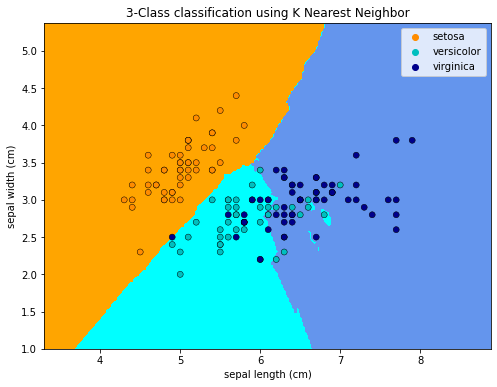

In [19]:
visualization(X, y, clf, "K Nearest Neighbor")

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = X[:,:2]
clf = LogisticRegression(random_state=0,max_iter=1000)

clf.fit(X,y)
print("Prediction Result for first 10 samples: ")
print(clf.predict(X[:10,:]))
print("Accuracy: ", clf.score(X,y))

Prediction Result for first 10 samples: 
[0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.82


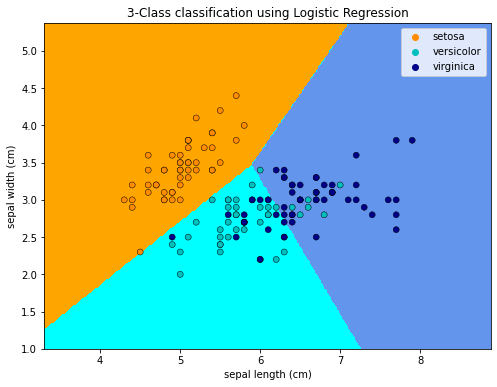

In [21]:
visualization(X, y, clf, "Logistic Regression")

In [22]:
#Support Vector Machine
from sklearn import svm

X, y = load_iris(return_X_y=True)
X = X[:,:2]

clf = svm.SVC()
clf.fit(X, y)

print("Prediction Result for first 10 samples: ")
print(clf.predict(X[:10,:]))
print("Accuracy: ", clf.score(X,y))

Prediction Result for first 10 samples: 
[0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.82


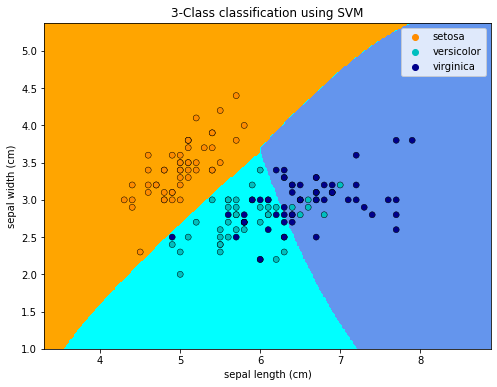

In [23]:
visualization(X, y, clf, "SVM")

In [24]:
# Decision Tree
from sklearn import tree

X, y = load_iris(return_X_y=True)
X = X[:,:2]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

print("Prediction Result for first 10 samples: ")
print(clf.predict(X[:10,:]))
print("Accuracy: ", clf.score(X,y))

Prediction Result for first 10 samples: 
[0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.9266666666666666


[Text(123.50853658536586, 209.07692307692307, 'X[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(32.66341463414634, 192.35076923076923, 'X[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(16.33170731707317, 175.62461538461537, 'X[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(8.165853658536586, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(24.49756097560976, 158.89846153846153, 'X[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(16.33170731707317, 142.1723076923077, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(8.165853658536586, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(24.49756097560976, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(32.66341463414634, 142.1723076923077, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(48.99512195121952, 175.62461538461537, 'X[0] <= 5.35\ngini = 0.043\nsamples = 45\nva

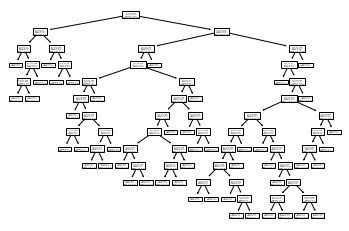

In [25]:
tree.plot_tree(clf)

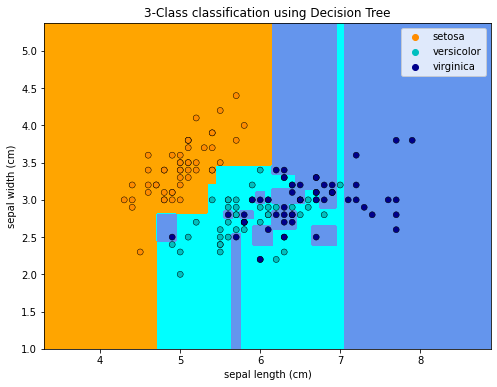

In [26]:
visualization(X, y, clf, "Decision Tree")

class sklearn.neural_network.MLPClassifier(**hidden_layer_sizes**=(100,), **activation**='relu', **solver**='adam', **alpha**=0.0001, batch_size='auto', **learning_rate**='constant', learning_rate_init=0.001, power_t=0.5, **max_iter**=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, **momentum**=0.9, nesterovs_momentum=True, early_stopping=False, **validation_fraction**=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [27]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(5, 2), max_iter=1000,random_state=1)
clf.fit(X, y)

print("Prediction Result for first 10 samples: ")
print(clf.predict(X[:10,:]))
print("Accuracy: ", clf.score(X,y))

Prediction Result for first 10 samples: 
[0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.82


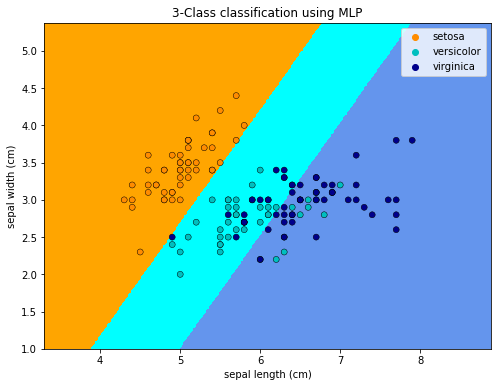

In [28]:
visualization(X, y, clf, "MLP")

### 2.3.1 Supervised learning: regression

In [29]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [30]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


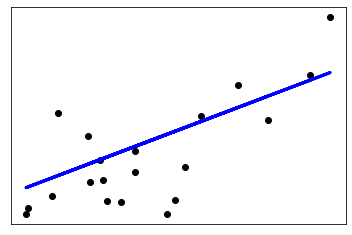

In [31]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### 2.3.2 Unsupervised learning: clustering

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

np.random.seed(0)

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
# #############################################################################
# Compute clustering with Means

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(X)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

In [33]:
# Visualize original data

plt.scatter(X[:, 0], X[:, 1], color=col, marker=".")

NameError: name 'col' is not defined

In [ ]:
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], color=col, marker=".")
    plt.scatter(
        cluster_center[0],
        cluster_center[1],
        marker="o",
        c=col,
        edgecolors="k",
    )
plt.show()

### 2.3.3 Dimensionality Reduction

In [34]:
# PCA
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

Text(0.5, 1.0, 'PCA of IRIS dataset')

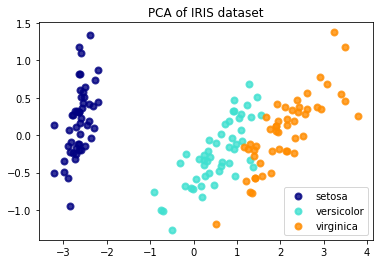

In [35]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

Text(0.5, 1.0, 'LDA of IRIS dataset')

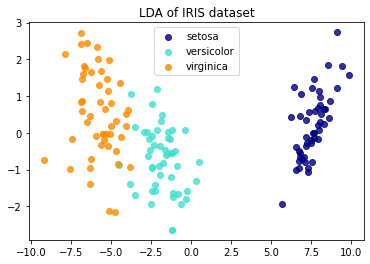

In [36]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

### Data Analysis (X)

- Loading, analysis, preprocessing

### Model Implementation (X)

- Training, validation, tuning, ensembling

### Performance Assessment <=

- scoring, presenting

## 2.4 Model Selection

- Cross validation
- Parameters tuning(grid search)
- Metric and scoring
- \*Validation and learning curve
- Ensemble methods

### 2.4.1 Cross validation

In [37]:
# Model Selection
## Cross Validation

from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
from sklearn import svm

X, y = load_iris(return_X_y=True)
clf = svm.SVC(kernel='linear', C=1, random_state=0)

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf, X, y, scoring=scoring, cv=5,return_estimator=True)

print("Keys of scores:", sorted(scores.keys()))
print("Recall Macro: ", scores['test_recall_macro'])

Keys of scores: ['estimator', 'fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
Recall Macro:  [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [38]:
scores["estimator"]

[SVC(C=1, kernel='linear', random_state=0),
 SVC(C=1, kernel='linear', random_state=0),
 SVC(C=1, kernel='linear', random_state=0),
 SVC(C=1, kernel='linear', random_state=0),
 SVC(C=1, kernel='linear', random_state=0)]

### 2.4.2 Tuning parameters

- Grid search

- Randomized parameter optimization

- Sucessive halving...

In [39]:
## Grid search
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [40]:
# Loop for each trial
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_
    
    #print(clf.best_params_)

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

Average difference of 0.007581 with std. dev. of 0.007833.


In [41]:
def grid_search_visualize():
    # Plot scores on each trial for nested and non-nested CV
    plt.figure()
    plt.subplot(211)
    (non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
    (nested_line,) = plt.plot(nested_scores, color="b")
    plt.ylabel("score", fontsize="14")
    plt.legend(
        [non_nested_scores_line, nested_line],
        ["Non-Nested CV", "Nested CV"],
        bbox_to_anchor=(0, 0.4, 0.5, 0),
    )
    plt.title(
        "Non-Nested and Nested Cross Validation on Iris Dataset",
        x=0.5,
        y=1.1,
        fontsize="15",
    )

    # Plot bar chart of the difference.
    plt.subplot(212)
    difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
    plt.xlabel("Individual Trial #")
    plt.legend(
        [difference_plot],
        ["Non-Nested CV - Nested CV Score"],
        bbox_to_anchor=(0, 1, 0.8, 0),
    )
    plt.ylabel("score difference", fontsize="14")

    plt.show()

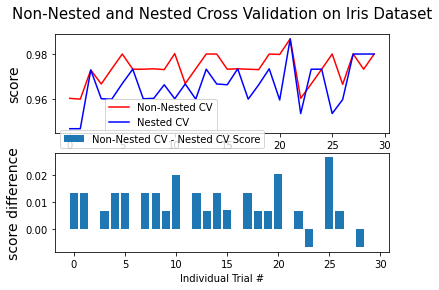

In [42]:
grid_search_visualize()

Nested CV estimates the generalization error of the underlying model and its (hyper)parameter search. Choosing the parameters that maximize non-nested CV biases the model to the dataset, yielding an overly-optimistic score.

Model selection without nested CV uses the same data to tune model parameters and evaluate model performance.

### 2.4.3 Metrics and Scoring

#### Estimator score methods(*)

Default evaluation criterion provided by estimators. 

#### Scoring parameter

Internal *scoring* strategy.
#### Metric functions

Functions implemented for assessing prediction result.

#### Scoring parameter:

- Customize pre-defined metrics

- Build your own scorer

In [43]:
# Case 1: Customize pre-defined metrics
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

# Case 2: Build your own scorer
import numpy as np

def my_custom_loss_func(y_true, y_pred):
    diff = np.abs(y_true - y_pred).max()
    return np.log1p(diff)

score = make_scorer(my_custom_loss_func, greater_is_better=False)

# Apply your scorer to estimator\
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                 scoring=ftwo_scorer, cv=5)

#### Metric functions (Take away): 

- functions ending with *_score* return a value to maximize, the higher the better.

- functions ending with *_error* or *_loss* return a value to minimize, the lower the better. 

In [44]:
# Metric functions
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

### 2.4.4 \*Validation and learning curve

#### Validation curve

- Plot the influence of a single hyperparameter.

- Is the model overfitting/underfitting?

#### Learning curve

- Plot the influence of number of training samples.

- Is there bias/variance error? 

In [45]:
# Validation curve
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),
    cv=5)
print("Train scores:")
print(train_scores)
print("Validation scores:")
print(valid_scores)

Train scores:
[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.9340217  0.94366412 0.92648377 0.91933304 0.929225  ]
 [0.51143526 0.52415737 0.49868907 0.47086988 0.49623503]]
Validation scores:
[[0.9055033  0.84185935 0.94569793 0.96231017 0.93366144]
 [0.90550088 0.84184574 0.94568969 0.96233172 0.93366806]
 [0.46706558 0.25698974 0.50496293 0.49826404 0.52500014]]


In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
   SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
print("Train scores:")
print(train_scores)
print("Validation scores:")
print(valid_scores)

Train scores:
[[0.98       0.98       0.98       0.98       0.98      ]
 [0.9875     1.         0.9875     0.9875     0.9875    ]
 [0.98181818 1.         0.98181818 0.98181818 0.99090909]]
Validation scores:
[[1.         0.93333333 1.         1.         0.96666667]
 [1.         0.96666667 1.         1.         0.96666667]
 [1.         0.96666667 1.         1.         0.96666667]]


### 2.4.5 Ensemble Methods

- Aggregate individual predictions to form a final prediction

- Voting, Bagging, AdaBoost, Gradient Tree Boosting...

In [47]:
# Ensemble Methods
# Run lively
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


# Q & A